# Multiple linear regression analysis - running dataset

The data was obtained from a run competition. There were 31 participants. The variables are:

age: age of the person

weight: weight of the person (in kg)

runtime: time necessary to run 1.5 miles

rstpulse: pulse rate in rest

runpulse: pulse rate at the end of the 1.5 miles

maxpulse: maximum pulse rate while running

oxygen: oxygen consumption, expressed in mL/kg/min.


The goal is to model the oxygen consumption by using the other variables

In [1]:
# import the data set
data <- read.table(file="/mnt/c/Users/Nnamdi/Desktop/Bioinformatics/Univariate_data_modelling/data/UDM/runtest.txt", header  = T)

In [2]:
head(data, n=10)

,age,weight,runtime,rstpulse,maxpulse,oxygen
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,57,73.37,12.63,58,176,39.407
2,54,79.38,11.17,62,165,46.080
3,52,76.32,9.63,48,166,45.441
4,50,70.87,8.92,48,155,54.625
5,51,67.25,11.08,48,172,45.118
6,54,91.63,12.88,44,172,39.203
7,51,73.71,10.47,59,188,45.790
8,57,59.08,9.93,49,155,50.545
9,49,76.32,9.40,56,188,48.673


 Descriptive statistics

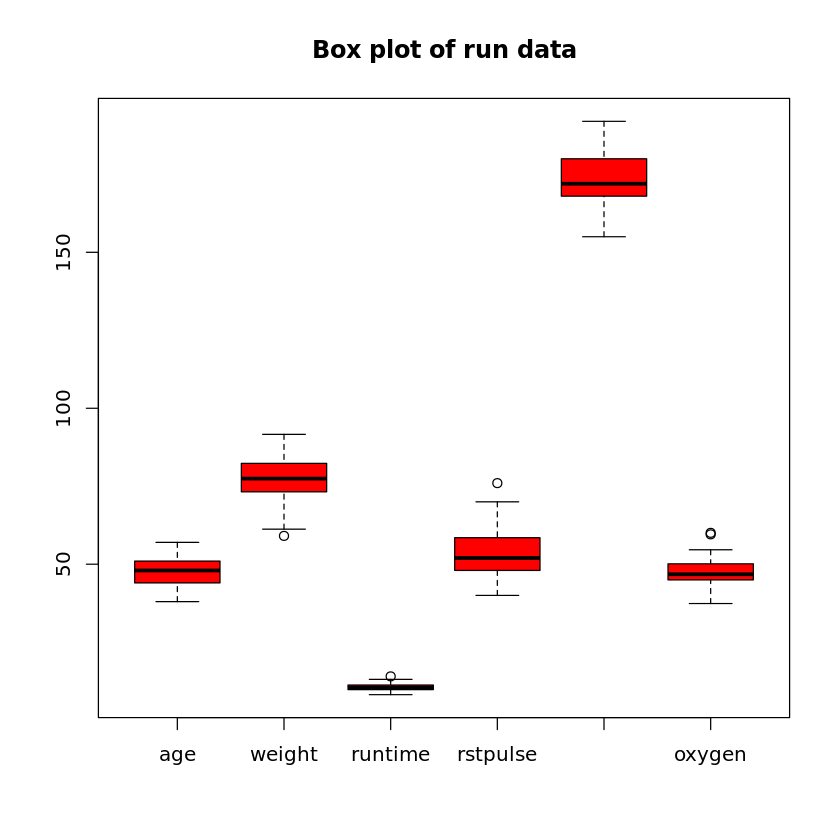

In [3]:
boxplot(data, col = "red", main = "Box plot of run data")

Correlation analysis between Oxygen and other variables

In [4]:
# test for normality with Shapiro wilk test
apply(data, 2, FUN = shapiro.test)

$age

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.9704, p-value = 0.5302


$weight

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97993, p-value = 0.8106


$runtime

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97359, p-value = 0.6223


$rstpulse

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.94694, p-value = 0.1285


$maxpulse

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96983, p-value = 0.5143


$oxygen

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.95366, p-value = 0.1968



In [5]:
# the variables have a normal distribution, so the pearsom correlation test will be used. Otherwise, Spearman correlation 
# test will be used.
data.cor <- cor(data, method = "pearson")
data.cor

,age,weight,runtime,rstpulse,maxpulse,oxygen
age,1.0000000,-0.23353903,0.1887453,-0.14156640,-0.4329159,-0.3045924
weight,-0.2335390,1.00000000,0.1435076,0.02270099,0.2493812,-0.1627528
runtime,0.1887453,0.14350758,1.0000000,0.40053599,0.2261030,-0.8621949
rstpulse,-0.1415664,0.02270099,0.4005360,1.00000000,0.2575034,-0.3464054
maxpulse,-0.4329159,0.24938123,0.2261030,0.25750341,1.0000000,-0.2367402
oxygen,-0.3045924,-0.16275285,-0.8621949,-0.34640540,-0.2367402,1.0000000


Linear regression of Oxygen using other variables

In [6]:
data.lm = lm(oxygen~.,data = data)
summary(data.lm)


Call:
lm(formula = oxygen ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0843 -1.4483  0.0672  1.2994  5.6408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.79397   14.14819   7.760 4.07e-08 ***
age          -0.25279    0.11473  -2.203    0.037 *  
weight       -0.04811    0.06269  -0.767    0.450    
runtime      -2.90391    0.42622  -6.813 3.85e-07 ***
rstpulse     -0.02553    0.06730  -0.379    0.708    
maxpulse     -0.08360    0.06408  -1.305    0.204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.69 on 25 degrees of freedom
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7449 
F-statistic: 18.52 on 5 and 25 DF,  p-value: 1.082e-07


The model has only two significant variables (age and runtime) that affect oxygen consumption

The estimated regression model is given as *Oxygen = 109.79 - 0.253(Age) - 2.904(Runtime)* 

This implies that when comparing individuals with the same runtime, we expect a decrease in oxygen consumption by 0.253 mL/kg/min with every 1 unit increase in age.

Also, when comparing individuals with the same age, there will be decrease in oxygen consumption by 2.904 mL/kg/min with every 1 minute increase in run time.

Likewise, the adjusted R square value indicates that approximately 75% variability in oxygen consumption can be explained by age and runtime of the individual.




### Check if the estimated regression model fulfils the underlying assumptions of linear regression

Linear regression uses the following assumptions: linearity, normality and constant variance.


1. Check for linearity by plotting (standardized) residuals versus fitted response. Alternatively, plot the(standardized) residuals versus each regressor. Linearity is fulfilled if there is random distribution of points in the plots

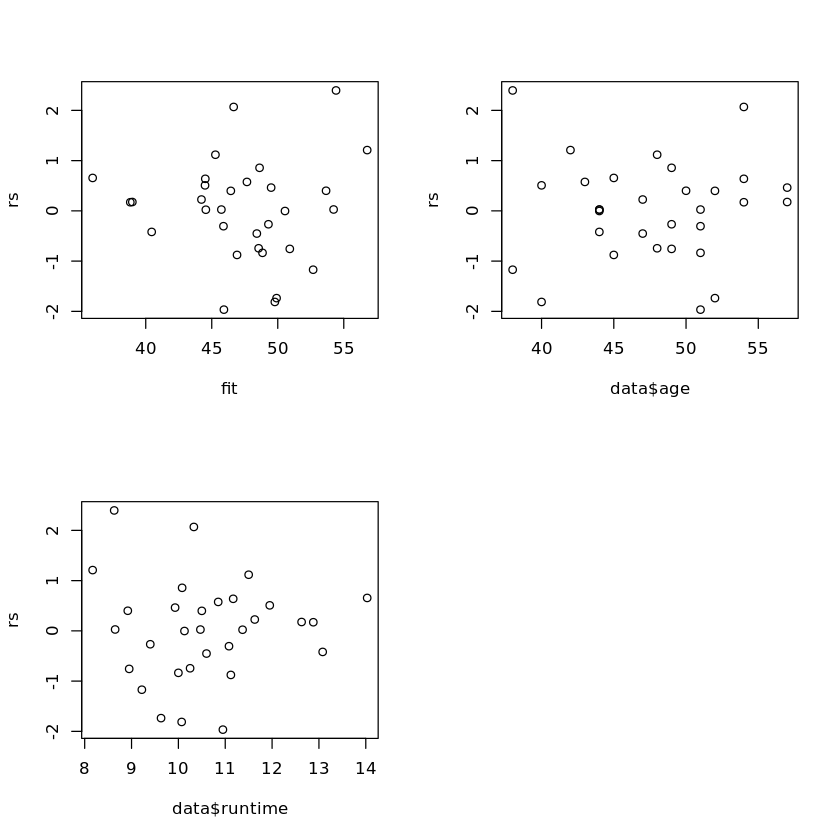

In [7]:
fit <- fitted(data.lm)
rs <- rstandard(data.lm)
par(mfrow=c(2,2))
plot(rs ~ fit)
plot(rs ~ data$age)
plot(rs ~ data$runtime)

There is random distribution of points in the plots hence the data fulfils the linearity criteria

2. Check for normality of (standardized) residuals

    Null hypothesis : standard residuals are normally distributed
    
    Alternative hypothesis : standard residuals are not normally distributed

In [8]:
shapiro.test(rs)   #rs == residuals


	Shapiro-Wilk normality test

data:  rs
W = 0.97322, p-value = 0.6114


Since the p-value > 0.05, we will not reject the null hypothesis. Thus, the normality criteria is fulfilled.

3. Check for constant variance (presence of influential points) using Cook's distance

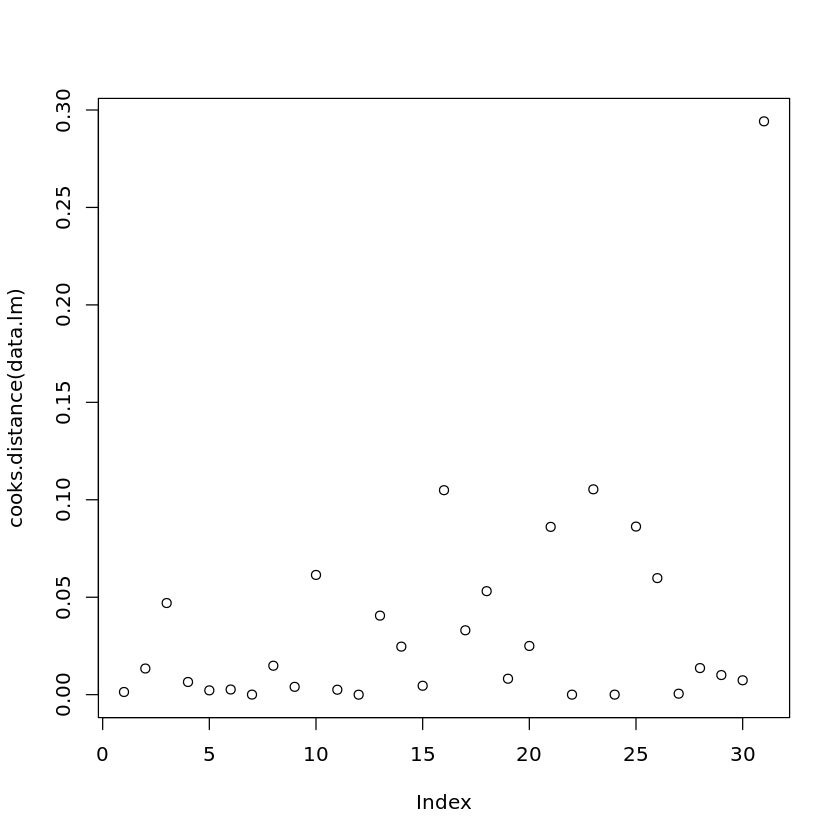

In [9]:
plot(cooks.distance(data.lm))

There is an outlying observation. This observation will be removed from the data and linear regression analysis will be repeated using the new data set. Then, the influence of the outlier point on the regression analysis can be estiamted.

In [10]:
## to find the outlying observation
data[which(cooks.distance(data.lm) > 0.25),]

,age,weight,runtime,rstpulse,maxpulse,oxygen
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
31,38,81.87,8.63,48,186,60.055


In [11]:
# Observation 31 is the outlier hence it will be removed from the dataset
data_new <- data[-31,]

In [12]:
# redo regression analysis
data.newLm <- lm(oxygen~.,data_new)
summary(data.newLm)


Call:
lm(formula = oxygen ~ ., data = data_new)

Residuals:
   Min     1Q Median     3Q    Max 
-5.264 -1.169  0.396  1.003  5.120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.759963  12.672328   8.661 7.52e-09 ***
age          -0.198644   0.104736  -1.897   0.0700 .  
weight       -0.052260   0.056173  -0.930   0.3615    
runtime      -2.687787   0.390203  -6.888 4.01e-07 ***
rstpulse     -0.005003   0.060766  -0.082   0.9351    
maxpulse     -0.117289   0.058761  -1.996   0.0574 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.41 on 24 degrees of freedom
Multiple R-squared:  0.7966,	Adjusted R-squared:  0.7542 
F-statistic:  18.8 on 5 and 24 DF,  p-value: 1.33e-07


Comparison of regression summary of both datasets indicate that the outlying point is not influential as it did not change the percenrage variablity of oxygen consumption explained by age an runtime. Therefore, this estimated regression model is good for predictions as it fulfils all the underlying assumptions.